In [ ]:
#========================================================================
# Copyright 2019 Science Technology Facilities Council
# Copyright 2019 University of Manchester
#
# This work is part of the Core Imaging Library developed by Science Technology	
# Facilities Council and University of Manchester
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0.txt
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# 
#=========================================================================

## Title
Few lines intro

In [ ]:
# d) Code etc
# e) Results

from ccpi.framework import TestData
import os, sys

from utilities import islicer

load = TestData(data_dir=os.path.join(os.environ['SIRF_INSTALL_PATH'], 'share', 'ccpi') )
data = load.load(TestData.PEPPERS, size=(400,400,3))

#data.subset(horizontal_x=100)




In [ ]:
# use the interactive slicer with a DataContainer
islicer(data, 2)

# can slice also based on the actual labels of the channel
print (data.dimension_labels)

islicer(data, 'channel')

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=512x512 at 0x7F9A59D07950>
GradientDescent setting up
GradientDescent configured


<IPython.core.display.Javascript object>


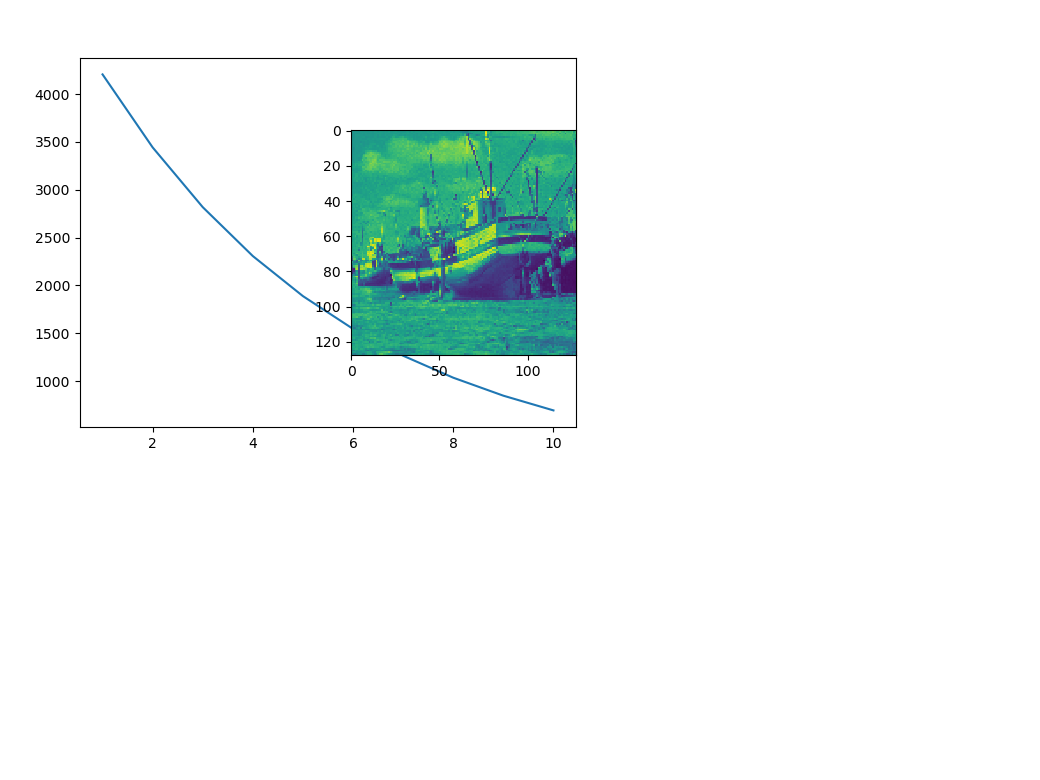

     Iter   Max Iter     Time/Iter            Objective
                               [s]                     
        0        200         0.000          5.13741e+03
        1        200         0.000          4.20545e+03
        2        200         0.002          3.44256e+03
        3        200         0.001          2.81806e+03
        4        200         0.001          2.30685e+03
        5        200         0.001          1.88837e+03
        6        200         0.001          1.54581e+03
        7        200         0.001          1.26539e+03
        8        200         0.001          1.03584e+03
        9        200         0.001          8.47934e+02
       10        200         0.001          6.94113e+02


In [1]:
from ccpi.framework import *
from ccpi.optimisation.functions import *
from ccpi.optimisation.operators import *
from ccpi.optimisation.algorithms import *
import matplotlib.pyplot as plt
import os
%matplotlib notebook

from utilities import setup_iplot2D, iplot2D

ig = ImageGeometry(128,128)
x_init = ig.allocate()
b = ig.allocate('random')
load = TestData(data_dir=os.path.join(os.environ['SIRF_INSTALL_PATH'], 'share', 'ccpi'))
b = load.load(TestData.BOAT, size=(128,128))

identity = Identity(ig)

norm2sq = Norm2Sq(identity, b)
rate = 0.3
rate = norm2sq.L / 2.1


x_init=identity.domain_geometry().allocate()
alg = GradientDescent(x_init=x_init, 
                      objective_function=norm2sq, 
                      rate=rate)
alg.max_iteration = 200




# this is a bit tricky as the variables that setup_iplot2D are used by                                                                                              iplot2D with that name    
updatable_plot = setup_iplot2D(x_init)
    
alg.run(10, verbose=True, callback=iplot2D(*updatable_plot))
# alg.run(10)                                                
# ax.clear()
# ax.plot(alg.loss)
# im.imshow(alg.get_output().as_array())
# fig.canvas.draw()

### Summary